In [1]:
import os

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, classification_report, roc_auc_score
import joblib
import pandas as pd
import numpy as np

## 逻辑回归

In [3]:
"""
逻辑回归做二分类进行癌症预测（根据细胞的属性特征）
:return: NOne
"""
# 构造列标签名字
column = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
          'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
          'Mitoses', 'Class']

# 读取数据
# data = pd.read_csv(
#     "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
#     names=column)
data = pd.read_csv(
    "./data/breast-cancer-wisconsin.csv",
    names=column)
# print(data) #想看可以解除
#当你读取数据时，看上去是数值的列，读进来是字符串，说明里边
# 存在了非数值情况
print(data.info())
print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None
        Sample code number  Clump Thickness  Uniformity of Cell Size  \
count         6.990000e+0

In [4]:
data['Bare Nuclei'].unique() #因为上面发现它是object类型

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [5]:
# 缺失值进行处理
data = data.replace(to_replace='?', value=np.nan)
#直接删除，哪一行有空值，就删除对应的样本
data = data.dropna()
print('-' * 50)
print(data.shape)

--------------------------------------------------
(683, 11)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           683 non-null    int64 
 1   Clump Thickness              683 non-null    int64 
 2   Uniformity of Cell Size      683 non-null    int64 
 3   Uniformity of Cell Shape     683 non-null    int64 
 4   Marginal Adhesion            683 non-null    int64 
 5   Single Epithelial Cell Size  683 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Bland Chromatin              683 non-null    int64 
 8   Normal Nucleoli              683 non-null    int64 
 9   Mitoses                      683 non-null    int64 
 10  Class                        683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [7]:
#分类的类别是2和4,对应 "良性", "恶性"
data[column[10]].unique()

array([2, 4])

In [8]:
#把第6列的字符串转化为数字类型
data[column[6]] = data[column[6]].astype('int16')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int16
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int16(1), int64(10)
memory usage: 60.0 KB


In [10]:
# 进行数据的分割,第零列是编号，不可以作为特征，把第1-9列作为特征，第10列作为标签
x_train, x_test, y_train, y_test = train_test_split(data[column[1:10]], data[column[10]], test_size=0.25,
                                                    random_state=1)

# 进行标准化处理
std = StandardScaler()

x_train = std.fit_transform(x_train) #训练集标准化
x_test = std.transform(x_test) #测试集标准化
x_train[0]

array([-1.21629973, -0.70863282, -0.75174943,  0.04301674, -0.55657068,
       -0.71054972, -0.99312055, -0.62911518, -0.36280962])

In [11]:
#
# # 逻辑回归预测
# C正则化力度
# solver = 'liblinear'  solver是学习率优化算法，就是学习率会随着epoch的变化而变化
#epoch就代表第几次迭代
#max_iter 最大迭代次数
lg = LogisticRegression(C=0.5, solver='lbfgs')
#
lg.fit(x_train, y_train)
# 逻辑回归的权重参数，了解，没那么重要
print(lg.coef_)

y_predict = lg.predict(x_test)
print(y_predict) #预测的标签
print("准确率：", lg.score(x_test, y_test))
print(y_test[0:5])
print('-'*50)
print(lg.predict_proba(x_test)[0:5])  #得出对应分类的概率


[[1.11400191 0.25293086 0.78938469 0.60986034 0.0728013  1.10834397
  0.7794668  0.64312128 0.67692658]]
[2 2 2 4 2 4 2 2 4 4 2 2 4 2 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 4 4 2 4 2
 2 4 4 4 2 2 4 2 2 2 2 4 2 2 2 4 2 2 2 4 2 2 2 2 4 2 2 2 4 2 4 4 2 2 4 2 2
 4 2 2 2 2 2 2 2 4 2 4 4 2 2 2 4 2 2 4 2 2 4 4 2 2 4 2 2 4 4 2 2 2 2 4 2 4
 4 2 4 2 4 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 2 2 2 2 2 4 2 4 4 2 2 4 2 2 2 2 4
 2 2 2 2 2 4 2 4 2 4 2 2 4 2 4 2 4 4 2 4 2 2 2]
准确率： 0.9824561403508771
444    2
24     2
195    2
49     4
375    2
Name: Class, dtype: int64
--------------------------------------------------
[[0.94893919 0.05106081]
 [0.99494175 0.00505825]
 [0.98365149 0.01634851]
 [0.02707911 0.97292089]
 [0.99732446 0.00267554]]


In [12]:
# 为什么还要看下召回率，labels和target_names对应
# macro avg 平均值  weighted avg 加权平均值
print(classification_report(y_test, y_predict, labels=[2, 4], target_names=["良性", "恶性"]))
#AUC计算要求是二分类，不需要是0和1
print("AUC指标：", roc_auc_score(y_test, y_predict))

              precision    recall  f1-score   support

          良性       0.97      1.00      0.99       111
          恶性       1.00      0.95      0.97        60

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

AUC指标： 0.975


In [13]:
print(x_train.shape)
print(x_test.shape)

(512, 9)
(171, 9)


## 聚类

In [31]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [15]:
# 读取四张表的数据
#读取了订单和产品id的关联，csv比较大
prior = pd.read_csv("./data/instacart/order_products__prior.csv")

In [16]:
#产品id，与过道的对应
products = pd.read_csv("./data/instacart/products.csv")

In [17]:
#订单id和用户id的对应，csv比较大
orders = pd.read_csv("./data/instacart/orders.csv")

In [18]:
#超市的过道，过道放的产品的品类
aisles = pd.read_csv("./data/instacart/aisles.csv")

In [19]:
prior.head()  #订单id，产品id，下面只需要掌握订单和产品的关联即可

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [20]:
products.head() #产品id，产品名称，过道id

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [21]:
orders.head() #订单id，用户id

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [22]:
aisles.head() #过道id，对应过道里放了哪些产品类别

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [23]:
# 合并四张表到一张表  （用户-物品类别），在这里挂了，用下阿里云
#订单表和产品表关联
#用户买了哪些订单，订单里面有哪些产品，产品对应的过道，过道对应的产品类别
_mg = pd.merge(prior, products, on=['product_id', 'product_id'])
_mg = pd.merge(_mg, orders, on=['order_id', 'order_id'])
mt = pd.merge(_mg, aisles, on=['aisle_id', 'aisle_id'])

In [24]:
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,baking ingredients
5,2,17794,6,1,Carrots,83,4,202279,prior,3,5,9,8.0,fresh vegetables
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,202279,prior,3,5,9,8.0,doughs gelatins bake mixes
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,202279,prior,3,5,9,8.0,spreads
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,202279,prior,3,5,9,8.0,packaged vegetables fruits
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,205970,prior,16,5,17,12.0,yogurt


In [25]:
mt.shape

(32434489, 14)

In [26]:
mt.isnull().sum()/mt.shape[0]  #数据缺失率，没有缺失值

order_id                  0.00000
product_id                0.00000
add_to_cart_order         0.00000
reordered                 0.00000
product_name              0.00000
aisle_id                  0.00000
department_id             0.00000
user_id                   0.00000
eval_set                  0.00000
order_number              0.00000
order_dow                 0.00000
order_hour_of_day         0.00000
days_since_prior_order    0.06407
aisle                     0.00000
dtype: float64

In [27]:
# 交叉表（特殊的分组工具），如果在这一步内存不够了，重启一下jupyter，还是不行，筛选一部分用户的数据，进行聚类
cross = pd.crosstab(mt['user_id'], mt['aisle'])

In [28]:
cross.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,19


In [29]:
#针对20万用户，有134个特征
cross.shape

(206209, 134)

In [32]:
# 进行主成分分析,那么大家还记得不？，保留90%的成分，实际特征数目减少了几倍，134--》27
pca = PCA(n_components=0.9)

In [33]:
data = pca.fit_transform(cross)  #还记得fit_transform的作用不？
data.shape

(206209, 27)

In [34]:
type(data)

numpy.ndarray

In [35]:
# 把样本数量减少,为了下面画图方便，这里只取500个样本
x = data[:500]
x.shape

(500, 27)

In [51]:
# 假设用户一共分为四个类别
#n_clusters是分为几个类别，是主要的超参
km = KMeans(n_clusters=4)

In [52]:
km.fit(x)  #开始训练

KMeans(n_clusters=4)

In [53]:
#开始预测
predict = km.predict(x)

In [39]:
print(predict)  #预测得到的是每一个样本的类别

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 3 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 3 0 1 1 0 0 1 0 0
 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 3 0 1 0 0 1 2 0 0 0 3 0 1 0 0 1 0 1 1
 3 0 0 0 3 0 1 0 0 3 1 1 0 1 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 0 0 1 0 0 0 0 3 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 3 0 3 0 0 0 3 0 0 0 0 1 0
 3 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1
 0 0 3 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 3 0 0 0 0 3 0 0 0 0
 0 3 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 2
 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 3 0 3 1 3 0 0 0 0 0 0 0 0 0 1 0 0 0 0 3
 0 0 0 0 1 1 0 0 0 0 0 0 

In [40]:
np.unique(predict)

array([0, 1, 2, 3], dtype=int32)

In [41]:
# 显示聚类的结果
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

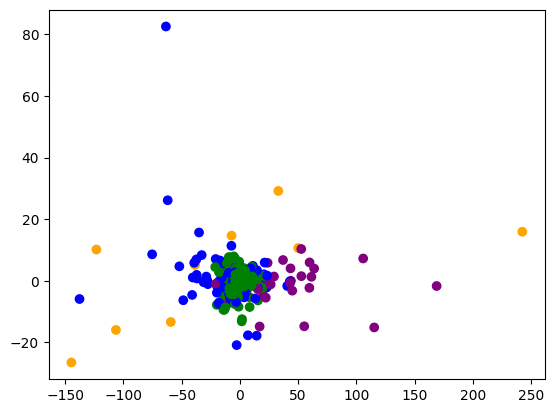

In [54]:
# 建立四个颜色的列表
colored = ['orange', 'green', 'blue', 'purple']
colr = [colored[i] for i in predict] #根据类别给每个样本赋予颜色
#去选择任意两个特征来看聚类的图，可以自行调整,第2个，第20个特征
plt.scatter(x[:, 1], x[:, 19], color=colr)


In [55]:
# 评判聚类效果，轮廓系数，聚类效果很难超过0.7，可以通过这个得分去调整上面KMeans的n_clusters
silhouette_score(x, predict)

0.4781909959560244

In [61]:
#改为2时的结果
km = KMeans(n_clusters=3)
km.fit(x)  #开始训练
predict = km.predict(x)
print(silhouette_score(x, predict))
predict

0.6143817456208673


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [58]:
# 通过分类后数据，去看原始样本的特点
cross.iloc[0]

aisle
air fresheners candles           0
asian foods                      0
baby accessories                 0
baby bath body care              0
baby food formula                0
                                ..
trash bags liners                0
vitamins supplements             0
water seltzer sparkling water    0
white wines                      0
yogurt                           1
Name: 1, Length: 134, dtype: int64

In [59]:
predict[26]
cross.iloc[26]

aisle
air fresheners candles             0
asian foods                        4
baby accessories                   0
baby bath body care                0
baby food formula                  0
                                ... 
trash bags liners                  0
vitamins supplements               0
water seltzer sparkling water     92
white wines                        0
yogurt                           150
Name: 27, Length: 134, dtype: int64

In [60]:
#改为3时的结果
km = KMeans(n_clusters=3)
km.fit(x)  #开始训练
predict = km.predict(x)
silhouette_score(x, predict)

0.6377392240924091

## 集成学习

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [63]:
x=np.arange(0,12).reshape(3,4)
y=np.array([True,False,True])
print(y)
print(x)
x[y,1]

[ True False  True]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([1, 9])

In [64]:
#x是特征，y是标签
x, y = datasets.make_moons(n_samples=50000, noise=0.3, random_state=42)
print(x.shape)
print(y.shape)
print(np.unique(y))

(50000, 2)
(50000,)
[0 1]


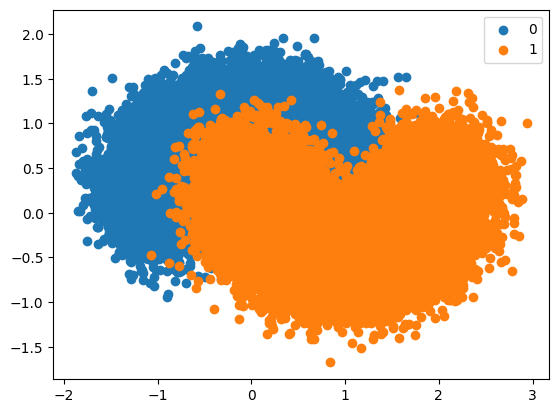

In [65]:
plt.scatter(x[y == 0, 0], x[y == 0, 1])  #拿到特征中标签为0的第0列，拿到标签为0的第一列
plt.scatter(x[y == 1, 0], x[y == 1, 1]) #拿到特征中标签为1的第0列，拿到标签为1的第一列
plt.legend(['0', '1'])
plt.show()  #图形的点颜色是自动的

In [66]:
x[0:10]

array([[ 0.71820567, -0.21809028],
       [ 0.11096372,  1.10964541],
       [ 0.61562814, -0.06539887],
       [ 0.46175947,  1.17926518],
       [ 1.22553968, -0.51211163],
       [ 1.27989488,  0.19395679],
       [ 0.51249388,  1.21727796],
       [ 1.97017831,  0.3277893 ],
       [ 0.63961463,  0.9269041 ],
       [ 0.38809941, -0.32770396]])

In [67]:
#默认分割比例是75%和25%
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression
#逻辑回归是搞分类的
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)
log_clf.score(x_test, y_test)

0.85344

In [69]:
from sklearn.svm import SVC

svm_clf = SVC() #支持向量机
svm_clf.fit(x_train, y_train)
svm_clf.score(x_test, y_test)

0.91216

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
dt_clf.score(x_test, y_test)

0.8764

# 1 手动实现投票分类器

In [71]:
#训练好模型，测试集做预测
y_predict1 = log_clf.predict(x_test)
y_predict2 = svm_clf.predict(x_test)
y_predict3 = dt_clf.predict(x_test)

In [72]:
#bagging，纯手动bagging
y_predict = np.array((y_predict1 + y_predict2 + y_predict3) >= 2, dtype='int')
y_predict[:10]

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [73]:
y_test[:10]

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [74]:
from sklearn.metrics import accuracy_score

#accuracy_score计算准确率的
accuracy_score(y_test, y_predict)

0.90472

# 2 集成学习VotingClassifier(并行)

In [75]:
from sklearn.ensemble import VotingClassifier

#hard模式就是少数服从多数
voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC()),
    ('dt_clf', DecisionTreeClassifier())], voting='hard')

In [76]:
voting_clf.fit(x_train, y_train)
voting_clf.score(x_test, y_test)

0.9044

In [77]:
# hard和soft区别请看课件解释,训练时间久
voting_clf2 = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC(probability=True)),  #支持向量机中需要加入probability
    ('dt_clf', DecisionTreeClassifier())], voting='soft')
voting_clf2.fit(x_train, y_train)
voting_clf2.score(x_test, y_test)


0.90312

## 使用bagging

In [78]:
from sklearn.tree import DecisionTreeClassifier  #用决策树集成上千模型
from sklearn.ensemble import BaggingClassifier

#估计器数目是5000呢？bootstrap是有放回抽样,max_samples不可以超过训练集的数目37500
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=300,
                                max_samples=3000, bootstrap=True)
bagging_clf.fit(x_train, y_train)
bagging_clf.score(x_test, y_test)

0.9128

# 3 oob设计

In [79]:
from sklearn.tree import DecisionTreeClassifier  #用决策树集成上千模型
from sklearn.ensemble import BaggingClassifier
#当去做有放回的抽样时，把没有取到的样本作为验证集，可以用oob_score来评估
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=1000,
                                 bootstrap=True,
                                 oob_score=True)
bagging_clf2.fit(x_train, y_train)
bagging_clf2.oob_score_  #拿没有取到的样本作为验证集

0.9154133333333333

In [80]:
bagging_clf2.score(x_test, y_test)

0.91184

### njobs

In [81]:
from sklearn.tree import DecisionTreeClassifier  #用决策树集成上千模型
from sklearn.ensemble import BaggingClassifier

In [82]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=500, max_samples=2000,
                                bootstrap=True)
bagging_clf.fit(x_train, y_train)
bagging_clf.score(x_test, y_test)
#cpu time是实际cpu运行算法时间，wall time是墙上真实时间，就是real time（包含了进程启动时间，I/O等待时间等）

CPU times: user 2.19 s, sys: 266 ms, total: 2.45 s
Wall time: 2.62 s


0.91176

In [83]:
%%time
#多核使用的时间更小, %%time要顶格来写
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=500, max_samples=2000,
                                bootstrap=True, n_jobs=-1)
bagging_clf.fit(x_train, y_train)
bagging_clf.score(x_test, y_test)

CPU times: user 84.4 ms, sys: 109 ms, total: 194 ms
Wall time: 1.55 s


0.9124

# 4 bootstrap_features  对特征进行采样

In [84]:
#因为我们就两个特征，所以max_features设置为1,得到的分值较低是因为我们特征较少，采用随机特征不合适
#这个是只对特征进行采样
random_subspaces_clf = BaggingClassifier(DecisionTreeClassifier(),
                                         n_estimators=500, max_samples=500, oob_score=True,
                                         bootstrap=True, n_jobs=-1,
                                         max_features=1, bootstrap_features=True)
random_subspaces_clf.fit(x, y)
random_subspaces_clf.oob_score_

0.88484

In [85]:
# 这里是为了验证总的抽样的样本数不能大于训练集的数目
random_patches_clf = BaggingClassifier(DecisionTreeClassifier(),
                                       n_estimators=500, max_samples=50001, oob_score=True,
                                       bootstrap=True, n_jobs=-1,
                                       max_features=1, bootstrap_features=True)
random_patches_clf.fit(x, y)
random_patches_clf.oob_score_
#这个代码有另外一个名字就是随机森林

ValueError: max_samples must be <= n_samples

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
%%time

rc_clf = RandomForestClassifier(n_estimators=500, random_state=666,
                                oob_score=True, n_jobs=-1)
rc_clf.fit(x, y)
rc_clf.oob_score_

CPU times: user 27.6 s, sys: 467 ms, total: 28 s
Wall time: 5.03 s


0.90302

In [88]:
%%time
rc_clf = RandomForestClassifier(max_samples=37500, n_jobs=-1)
rc_clf.fit(x_train, y_train)
rc_clf.score(x_test, y_test)

CPU times: user 4.04 s, sys: 107 ms, total: 4.15 s
Wall time: 576 ms


0.90384

In [89]:
%%time
#max_leaf_nodes 最大的叶子结点数
rc_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 random_state=666,
                                 oob_score=True, n_jobs=-1)
rc_clf2.fit(x, y)
rc_clf2.oob_score_

CPU times: user 12.9 s, sys: 382 ms, total: 13.3 s
Wall time: 2.67 s


0.90962

# 5 Extra-Trees
ExtraTreesClassifier 是一种机器学习算法，属于基于决策树的集成方法家族。
它随机选择特征子集和数据样本来构建多个决策树，并将它们的预测聚合起来做出最终预测。
它可用于分类任务，并以处理嘈杂和高维数据的能力而闻名。

In [90]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators=500, oob_score=True,
                              bootstrap=True, n_jobs=-1)
et_clf.fit(x, y)
et_clf.oob_score_

0.90688

# Boosting

# 5 串行（包含adaboost和GBDT）

In [91]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [92]:
%%time
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(),algorithm='SAMME',
                             n_estimators=500)
ada_clf.fit(x_train, y_train)
ada_clf.score(x_test, y_test)


CPU times: user 97.4 ms, sys: 1.92 ms, total: 99.3 ms
Wall time: 99.6 ms


0.8752

In [93]:
#它默认用的也是决策树，增加了基分类器的数目后，准确率提升
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=3, n_estimators=500)
gb_clf.fit(x_train, y_train)
gb_clf.score(x_test, y_test)

0.91192

In [94]:
import numpy as np

print(np.log(9))  #当错误率是0.1时权重是2.19
np.log((1-0.5)/0.5)  #当错误率是0.5时，权重是0

2.1972245773362196


0.0